<a href="https://colab.research.google.com/github/coldsober-irene/ASSIGNMENTS/blob/main/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from collections import Counter
from random import randint
import copy
from math import sqrt
import seaborn as sns
import pandas as pd
import numpy as np
import psutil

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
junk_datasets = pd.read_csv('/content/drive/MyDrive/my softwares/machine vision/data.csv')
clean = junk_datasets.dropna()



#Memory usage

In [ ]:
def memory_usage():
    process = psutil.Process()
    mem = process.memory_info().rss / (1024)  # Memory usage in MB
    return mem

#convert type into numerical data (1 and 0)

In [ ]:
mixed = []

In [ ]:
for i in range(len(clean)):
  mixed.append(list(clean.iloc[i]))



#mix data

In [ ]:
features = np.array(mixed)[:, 1:]
labels = np.array(mixed)[:, 0]

In [ ]:
def euclidean_dist(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

In [ ]:
class KNN:
  def __init__(self, k = 5) -> None:
    self.k = k

  def fit(self, x, y):
    self.x_train = x
    self.y_train = y
    print(len(x_train), len(y_train))

  def predict(self, X):
    predictions = [self._prediction(x) for x in X]
    return predictions

  def _prediction(self, x):
    distances = [euclidean_dist(x, x_train) for x_train in self.x_train]

    # closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common_label = Counter(k_nearest_labels).most_common()
    return most_common_label[0][0]


In [ ]:
class pca:
    def __init__(self, df_array) -> None:
        self.df_arr = df_array
        self.standardized_df = []
        self.cols = [str(i) for i in range(len(df_array[0]))]
        # STANDARDIZE DATASET SUCH THAT MEAN WILL BE 0 AND STANDARD DEVIATION BE 1
        self.std_data = self.standadardize_data()
        self.cov_matrix = self.compute_covariance_matrix(self.std_data)

    def pca_chosen(self, components = 3):
        return self.Compute_principal_components(cov_matrix=self.cov_matrix, components = components)

    def standadardize_data(self):
        data_with_mean_0 = self.df_arr - self.df_arr.mean()
        data_with_std_1 = data_with_mean_0 / self.df_arr.std()
        standardized_data = data_with_std_1
        self.standardized_df = pd.DataFrame(standardized_data, columns = self.cols)

        # mean of each feature
        each_feature_mean = self.standardized_df.mean()
        for index, col in enumerate(self.cols):
            self.standardized_df[col] -= each_feature_mean[index]
        return self.standardized_df

    def compute_covariance_matrix(self, standardized_data):
        multiplied = pd.DataFrame()
        for col in self.cols:
            for j, COL in enumerate(self.cols):
                if j != len(self.cols):
                    multiplied[col + " " + self.cols[j]] = standardized_data[col] * standardized_data[self.cols[j]]

        sums = multiplied.sum()
        c = [i for i in range(0, len(sums), len(self.cols))]

        Covariance_matrix = []
        for i, index in enumerate(c):
            try:
                Covariance_matrix.append(list(sums[index:c[i+1]]))
            except IndexError:
                Covariance_matrix.append(list(sums[index:]))

        covariance_df = pd.DataFrame(Covariance_matrix, columns=self.cols, index = self.cols)
        cov_matrix = np.array(Covariance_matrix)
        return cov_matrix

    def Compute_principal_components(self, cov_matrix, components = 3):
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvalues_eugenvectors = {eigenvalue:eigenvectors[index] for index, eigenvalue in enumerate(eigenvalues)}
        eigenvalues.sort()

        # CHOOSE ONLY TOP 3 MAXIMUM EIGENVALUES AND GET THEIR EIGENVECTORS
        max_3_eigenvectors = eigenvalues[::-1][:components]
        eigenvectors_of_top_3_eigenvalues = np.array([eigenvalues_eugenvectors[eigen] for eigen in max_3_eigenvectors])

        eigenvectors_of_top_3_eigenvalues = np.transpose(eigenvectors_of_top_3_eigenvalues)
        reduced_dimension_wine_dataset = np.dot(self.df_arr, eigenvectors_of_top_3_eigenvalues)
        pc_df = pd.DataFrame(reduced_dimension_wine_dataset, columns = [f'Pc{i}' for i in range(len(reduced_dimension_wine_dataset[0]))])
        # p = pc_df
        # dfi.export(pc_df.head(15).style.set_table_styles(), "pca.png", table_conversion="matplotlib")
        return reduced_dimension_wine_dataset, pc_df

# without pca

In [ ]:
x_train = features[:int(len(features) * .8)]
x_test = features[int(len(features) * .8):]
y_train = labels[:int(len(labels) * .8)]
y_test = labels[:int(len(labels) * .8)]

In [ ]:
no_pca_memory1 = memory_usage()
classifier = KNN(k = 47)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_train)
print("Prediction: ",predictions)
print(f"y_text: {y_test}")
acc = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {acc}")
no_pca_memory2 = memory_usage()
print(f"WITHOUT PCA MEMORY USAGE: {no_pca_memory2 - no_pca_memory1} KB")

5169 5169
Prediction:  [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0

#with pca

In [ ]:
def run_pca(dict_obj:dict, pcs):
  pca_x_train = features[:int(len(pcs) * .8)]
  pca_x_test = features[int(len(pcs) * .8):]
  pca_y_train = labels[:int(len(labels) * .8)]
  pca_y_test = labels[:int(len(labels) * .8)]
  withPca_memory1 = memory_usage()
  pca_classifier = KNN(k = 47)
  pca_classifier.fit(pca_x_train, pca_y_train)
  pca_predictions = pca_classifier.predict(pca_x_train)

  print("Prediction: ",pca_predictions)
  print(f"y_text: {y_test}")
  pca_acc = np.sum(pca_predictions == y_test) / len(y_test)
  print(f"Accuracy: {pca_acc}")
  dict_obj['accuracy'][pcs.shape] = pca_acc
  withPca_memory2 = memory_usage()
  dict_obj['memory'][pcs.shape] = withPca_memory2 - withPca_memory1
  print(f"WITH PCA MEMORY USAGE: {withPca_memory2 - withPca_memory1} KB")

In [ ]:
def plotting(data):
  # Create a DataFrame for easier plotting with Seaborn
  df = pd.DataFrame(data, columns=[str(i) for i in range(len(data[0]))])

  # Create a pair plot
  sns.set(style="ticks")
  sns.pairplot(df, markers='o', diag_kind='kde')

  # Show the plot
  plt.show()

def other_plot(data, labels, xtheta = 90, ytheta = 45, title = 'Correlation Heatmap'):
  # Convert the data to a DataFrame
  df = pd.DataFrame(data)

  # Calculate the correlation matrix
  correlation_matrix = df.corr()

  # Create a correlation heatmap
  plt.figure(figsize=(8, 6))
  ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 9}) #, yticklabels=['09','06','02']
  ax.set_xticklabels(labels, rotation=xtheta)
  ax.set_yticklabels(labels, rotation=ytheta)
  plt.title(title)

  plt.show()

#plot data before pca

In [ ]:
# plotting(data = features)

#plot pca data

In [ ]:
# plotting(all_pca)

In [ ]:
# other_plot(data = features, labels = list(clean.columns)[1:], ytheta = 0, title = "original data correlation")
# other_plot(data = mixed, labels = list(clean.columns), ytheta = 0, title = "original data correlation")
# other_plot(data = all_pca, labels = ['PC1', 'PC2', 'PC3'], ytheta = 0, title = 'Principal components correlation')


In [20]:
error_rate_pca = {'accuracy':{}, 'memory':{}}
pc = pca(df_array=features)
for i in range(2, 101):
  all_pca, _ = pc.pca_chosen(components = i)
  all_pca = np.array(all_pca)
  run_pca(pcs = all_pca, dict_obj = error_rate_pca)



Streaming output truncated to the last 5000 lines.
<ipython-input-12-d1546365ddcf>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  multiplied[col + " " + self.cols[j]] = standardized_data[col] * standardized_data[self.cols[j]]
<ipython-input-12-d1546365ddcf>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  multiplied[col + " " + self.cols[j]] = standardized_data[col] * standardized_data[self.cols[j]]
<ipython-input-12-d1546365ddcf>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

5169 5169
Prediction:  [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0

In [27]:
print(error_rate_pca)

{'accuracy': {(6462, 2): 0.9011414200038692, (6462, 3): 0.9011414200038692, (6462, 4): 0.9011414200038692, (6462, 5): 0.9011414200038692, (6462, 6): 0.9011414200038692, (6462, 7): 0.9011414200038692, (6462, 8): 0.9011414200038692, (6462, 9): 0.9011414200038692, (6462, 10): 0.9011414200038692, (6462, 11): 0.9011414200038692, (6462, 12): 0.9011414200038692, (6462, 13): 0.9011414200038692, (6462, 14): 0.9011414200038692, (6462, 15): 0.9011414200038692, (6462, 16): 0.9011414200038692, (6462, 17): 0.9011414200038692, (6462, 18): 0.9011414200038692, (6462, 19): 0.9011414200038692, (6462, 20): 0.9011414200038692, (6462, 21): 0.9011414200038692, (6462, 22): 0.9011414200038692, (6462, 23): 0.9011414200038692, (6462, 24): 0.9011414200038692, (6462, 25): 0.9011414200038692, (6462, 26): 0.9011414200038692, (6462, 27): 0.9011414200038692, (6462, 28): 0.9011414200038692, (6462, 29): 0.9011414200038692, (6462, 30): 0.9011414200038692, (6462, 31): 0.9011414200038692, (6462, 32): 0.9011414200038692, (6

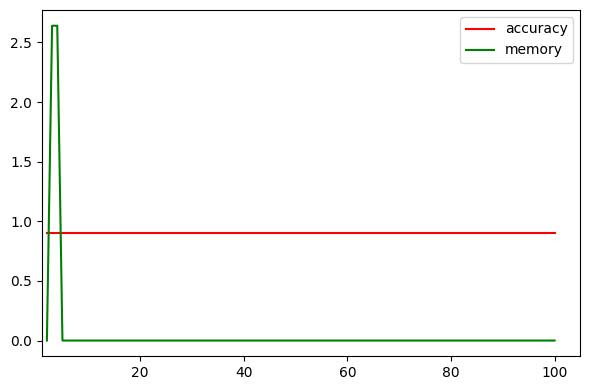

In [25]:
accs = list(error_rate_pca['accuracy'].values())
mem = np.array(list(error_rate_pca['memory'].values())) * 0.01
principals = [row[1] for row in error_rate_pca['accuracy'].keys()]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
axs.plot(principals, accs, color = "red", label = 'accuracy')
# axs.title()
axs.plot(principals, mem, color = "green", label = 'memory')
# axs.title('memory')
axs.legend()
plt.xlim(1, )
plt.tight_layout()
plt.show()